In [92]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')

from py_utils.annealing_brush import annealing_anion
from py_utils.quenched_brush import quecnhed_br
from py_utils.gen_namics_in import generate_files

import re
import shutil

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Массивы и константы

In [93]:
N = 300
S = 150
Cs = 0.001
pK_brush = 5.5
pK_minus = 5
pK_plus = 9
f_plus = 0.334

delta_pK_range = np.linspace(-2.5, 2.5, num = 60)
pHb_range_check = [pK_brush - delta_pK_range[i] for i in range(len(delta_pK_range))]

Annealing brush

In [94]:
free_energy_at_zero, free_energy_at_zero_theory, alpha_z_av, pHb_range, charge_buf = [],[],[],[],[]
for dpk in delta_pK_range:
    pHb, file_name_pro_annealing = generate_files(template_anneal = 'annealing_brush_temp.in',
                        template_quecnhed = 'quecnhed_brush_temp.in',
                        #Какой шаблон меняем?
                        current_name = 'annealing_brush_temp.in',

                        #название параметра
                        range_param = 'dpK',

                        N_brush = N,
                        S = S,
                        pK_brush = pK_brush,
                        Cs = Cs,
                        delta_pK = dpk,
                        min_range_value = min(delta_pK_range),
                        max_range_value = max(delta_pK_range))
    
    #THEORY
    H, alpha_H, tlambda, K, alpha_z_mean, alpha_z, alpha_b, \
            delta_pK, pH_b, pH_iep, pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, Q_mean,  = annealing_anion(
            N = N, 
            S = S,
            Cs = Cs,
            delta_pK = dpk,
            pK = pK_brush,

            #Параметры белка
            f_plus = f_plus, #доля заряженных групп на поверхности
            pK_plus = pK_plus,
            pK_minus = pK_minus, 
            file_name = file_name_pro_annealing)
    
    #Append
    free_energy_at_zero.append(f_ion_SCF[5])
    free_energy_at_zero_theory.append(f_ion_in[0])
    alpha_z_av.append(alpha_z_mean)
    pHb_range.append(pH_b)
    charge_buf.append(charge_SCF[N+10])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
0 iterations to find alphabulk values. 
NEWTON has been notified.
Your guess:it =  0  E = 3.359017e+00 |g| = 1.220728e+01 alpha = 1.000000e+00 
hessian scaling: 4.21915
it =  1  E = 2.898825e+00 |g| = 1.000072e+01 alpha = 1.081918e-01 
it =  2  E = 1.763085e+00 |g| = 1.141921e+01 alpha = 3.151010e-01 
it =  3  E = 1.408080e+01 |g| = 1.355722e+01 alpha = 5.658996e-03 
it =  4  E = 4.333781e+00 |g| = 1.247412e+01 alpha = 6.399694e-02 
it =  5  E = 3.763327e+00 |g| = 1.158360e+01 alpha = 7.544609e-02 
it =  6  E = 8.142894e+00 |g| = 1.232968e+01 alpha = 1.760871e-02 
hessian scaling: 3.3191
it =  7  E = 2.844374e+00 |g| = 9.538061e+00 alpha = 1.081105e-01 
it =  8  E = 1.810636e+00 |g| = 1.006639e+01 alpha = 2.626810e-01 
it =  9  E = 5.051832e+00 |g| = 1.000704e+01 alp

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\


it =  7  E = 2.843390e+00 |g| = 9.532052e+00 alpha = 1.081178e-01 
it =  8  E = 1.812216e+00 |g| = 1.006434e+01 alpha = 2.621791e-01 
it =  9  E = 5.070718e+00 |g| = 1.000129e+01 alpha = 3.116900e-02 
it =  10  E = 7.842401e+00 |g| = 1.181523e+01 alpha = 1.653399e-02 
it =  11  E = 3.307927e+00 |g| = 1.230426e+01 alpha = 9.071945e-02 
it =  12  E = 9.920488e+00 |g| = 1.228074e+01 alpha = 1.076754e-02 
it =  13  E = 2.521095e+01 |g| = 1.223715e+01 alpha = 1.727657e-03 
hessian scaling: 5.45329
it =  14  E = 2.614587e+00 |g| = 8.671653e+00 alpha = 1.081718e-01 
it =  15  E = 1.167736e+00 |g| = 9.224323e+00 alpha = 5.554268e-01 
it =  16  E = 5.659749e+00 |g| = 1.272698e+01 alpha = 3.474497e-02 
it =  17  E = 2.756149e+00 |g| = 8.938980e+00 alpha = 1.042020e-01 
it =  18  E = 3.949963e+00 |g| = 8.979594e+00 alpha = 4.915624e-02 
it =  19  E = 3.752488e+00 |g| = 9.045895e+00 alpha = 5.168863e-02 
it =  20  E = 1.417465e+01 |g| = 8.892890e+00 alpha = 3.327883e-03 
it =  21  E = 4.997191e+00

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\


it =  7  E = 2.842196e+00 |g| = 9.524764e+00 alpha = 1.081266e-01 
it =  8  E = 1.814147e+00 |g| = 1.006190e+01 alpha = 2.615691e-01 
it =  9  E = 5.094148e+00 |g| = 9.994315e+00 alpha = 3.086254e-02 
it =  10  E = 7.897806e+00 |g| = 1.180721e+01 alpha = 1.629176e-02 
it =  11  E = 3.308364e+00 |g| = 1.229399e+01 alpha = 9.062393e-02 
it =  12  E = 9.951413e+00 |g| = 1.226734e+01 alpha = 1.068942e-02 
it =  13  E = 2.438321e+01 |g| = 1.223190e+01 alpha = 1.845951e-03 
hessian scaling: 5.45596
it =  14  E = 2.613664e+00 |g| = 8.666184e+00 alpha = 1.081753e-01 
it =  15  E = 1.166770e+00 |g| = 9.218420e+00 alpha = 5.559915e-01 
it =  16  E = 5.655988e+00 |g| = 1.271424e+01 alpha = 3.475483e-02 
it =  17  E = 2.759949e+00 |g| = 8.930826e+00 alpha = 1.038151e-01 
it =  18  E = 3.941434e+00 |g| = 8.971484e+00 alpha = 4.932595e-02 
it =  19  E = 3.743148e+00 |g| = 9.037367e+00 alpha = 5.190255e-02 
it =  20  E = 1.428268e+01 |g| = 8.884534e+00 alpha = 3.274984e-03 
it =  21  E = 4.992246e+00

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\


it =  1  E = 2.894878e+00 |g| = 9.975395e+00 alpha = 1.082123e-01 
it =  2  E = 1.763335e+00 |g| = 1.139258e+01 alpha = 3.142717e-01 
it =  3  E = 1.407820e+01 |g| = 1.352339e+01 alpha = 5.657218e-03 
it =  4  E = 4.336037e+00 |g| = 1.245015e+01 alpha = 6.380486e-02 
it =  5  E = 3.765644e+00 |g| = 1.156015e+01 alpha = 7.521113e-02 
it =  6  E = 8.068952e+00 |g| = 1.228902e+01 alpha = 1.787723e-02 
hessian scaling: 3.30204
it =  7  E = 2.840747e+00 |g| = 9.515924e+00 alpha = 1.081373e-01 
it =  8  E = 1.816503e+00 |g| = 1.005896e+01 alpha = 2.608291e-01 
it =  9  E = 5.123336e+00 |g| = 9.985849e+00 alpha = 3.048742e-02 
it =  10  E = 7.966758e+00 |g| = 1.179747e+01 alpha = 1.599777e-02 
it =  11  E = 3.308893e+00 |g| = 1.228142e+01 alpha = 9.050728e-02 
it =  12  E = 9.992252e+00 |g| = 1.225090e+01 alpha = 1.058849e-02 
it =  13  E = 2.338159e+01 |g| = 1.222608e+01 alpha = 2.006252e-03 
hessian scaling: 5.4593
it =  14  E = 2.612535e+00 |g| = 8.659470e+00 alpha = 1.081792e-01 
it =  15

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\


it =  7  E = 2.834260e+00 |g| = 9.476372e+00 alpha = 1.081855e-01 
it =  8  E = 1.827125e+00 |g| = 1.004618e+01 alpha = 2.575410e-01 
it =  9  E = 5.264478e+00 |g| = 9.947846e+00 alpha = 2.877049e-02 
it =  10  E = 8.299298e+00 |g| = 1.175377e+01 alpha = 1.468686e-02 
it =  11  E = 3.311240e+00 |g| = 1.222368e+01 alpha = 8.997687e-02 
it =  12  E = 1.023211e+01 |g| = 1.217597e+01 alpha = 1.003837e-02 
it =  13  E = 1.899375e+01 |g| = 1.220946e+01 alpha = 3.033871e-03 
it =  14  E = 4.337440e+01 |g| = 1.259451e+01 alpha = 5.756035e-04 
it =  15  E = 3.443317e+01 |g| = 1.301531e+01 alpha = 9.764767e-04 
hessian scaling: 5.76122
it =  16  E = 2.613401e+00 |g| = 8.601978e+00 alpha = 1.076833e-01 
it =  17  E = 1.042946e+00 |g| = 8.655762e+00 alpha = 6.522800e-01 
it =  18  E = 6.252871e+00 |g| = 1.037861e+01 alpha = 2.313088e-02 
it =  19  E = 5.507270e+00 |g| = 8.788786e+00 alpha = 2.532845e-02 
it =  20  E = 6.251678e+00 |g| = 9.064160e+00 alpha = 1.961941e-02 
it =  21  E = 4.045902e+00

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\


it =  7  E = 2.831112e+00 |g| = 9.457198e+00 alpha = 1.082088e-01 
it =  8  E = 1.832299e+00 |g| = 1.004012e+01 alpha = 2.559655e-01 
it =  9  E = 5.339625e+00 |g| = 9.929351e+00 alpha = 2.791713e-02 
it =  10  E = 8.475701e+00 |g| = 1.173255e+01 alpha = 1.405646e-02 
it =  11  E = 3.312403e+00 |g| = 1.219491e+01 alpha = 8.971348e-02 
it =  12  E = 1.039523e+01 |g| = 1.213990e+01 alpha = 9.698184e-03 
it =  13  E = 1.697168e+01 |g| = 1.220887e+01 alpha = 3.797980e-03 
it =  14  E = 2.631589e+01 |g| = 1.272195e+01 alpha = 1.578040e-03 
it =  15  E = 8.055628e+01 |g| = 1.228661e+01 alpha = 1.526762e-04 
it =  16  E = 1.244559e+02 |g| = 1.258428e+01 alpha = 6.989913e-05 
it =  17  E = 1.560928e+02 |g| = 1.281853e+01 alpha = 4.691904e-05 
hessian scaling: 5.65289
it =  18  E = 2.606204e+00 |g| = 8.562304e+00 alpha = 1.078012e-01 
it =  19  E = 1.061625e+00 |g| = 8.622029e+00 alpha = 6.274723e-01 
it =  20  E = 5.670500e+00 |g| = 1.026658e+01 alpha = 2.782355e-02 
it =  21  E = 7.826468e+00

/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1 \
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:76: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  - (1 -alpha_h) * np.exp(alpha_b * (h**2 - t**2)))**3, 0, h)[0] + ((K * H_0)**2 * alpha_b)/(4) * integrate.quad(lambda t:\
/home/tpopova/prj/polymer_brush/py_utils/annealing_brush.py:75: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -1*(alpha_b**2 * integrate.quad(lambda t: (1 - (1 - alpha_h) * (1 + 2*alpha_b*t**2) * np.exp(alpha_b * (h**2 - t**2)))/(1

Your guess:it =  0  E = 3.325229e+00 |g| = 1.198011e+01 alpha = 1.000000e+00 
hessian scaling: 4.15209
it =  1  E = 2.869317e+00 |g| = 9.812219e+00 alpha = 1.083472e-01 
it =  2  E = 1.765215e+00 |g| = 1.122046e+01 alpha = 3.088305e-01 
it =  3  E = 1.408429e+01 |g| = 1.330524e+01 alpha = 5.629328e-03 
it =  4  E = 4.350727e+00 |g| = 1.229457e+01 alpha = 6.256312e-02 
it =  5  E = 3.782034e+00 |g| = 1.141219e+01 alpha = 7.367435e-02 
it =  6  E = 7.653178e+00 |g| = 1.202889e+01 alpha = 1.947560e-02 
hessian scaling: 3.19072
it =  7  E = 2.817040e+00 |g| = 9.371590e+00 alpha = 1.083133e-01 
it =  8  E = 1.855444e+00 |g| = 1.001369e+01 alpha = 2.491059e-01 
it =  9  E = 5.741557e+00 |g| = 9.846445e+00 alpha = 2.395419e-02 
it =  10  E = 9.409665e+00 |g| = 1.163900e+01 alpha = 1.131374e-02 
it =  11  E = 3.319464e+00 |g| = 1.206496e+01 alpha = 8.843426e-02 
it =  12  E = 1.203584e+01 |g| = 1.202254e+01 alpha = 7.168936e-03 
it =  13  E = 9.624203e+00 |g| = 1.230637e+01 alpha = 1.186817e-0

Quecnhed brush генерируем только один файл с постоянной \alpha, так как при измении альфа абсорбция будет похожа на абсорбцию слабой щеткой

In [95]:
pH_b, file_name_pro_quecnhed = generate_files(template_anneal = 'annealing_brush_temp.in',
            template_quecnhed = 'quecnhed_brush_temp.in',
            #Какой шаблон меняем?
            current_name = 'quecnhed_brush_temp.in',

            #название параметра
            range_param_q = 'alpha',

            N_brush = N,
            S = S,
            pK_brush = pK_brush,
            Cs = Cs,
            min_range_value = round(np.mean(alpha_z_av),2),
            max_range_value = round(np.mean(alpha_z_av),2),
            alpha_z_average = np.mean(alpha_z_av))

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.848998e+00 |g| = 4.227498e+00 alpha = 1.000000e+00 
hessian scaling: 1.25349
it =  1  E = 1.661246e+00 |g| = 3.753799e+00 alpha = 1.236547e-01 
it =  2  E = 2.122220e+00 |g| = 4.180797e+00 alpha = 7.938887e-02 
it =  3  E = 1.245841e+01 |g| = 3.756177e+00 alpha = 1.916109e-03 
it =  4  E = 4.548739e+00 |g| = 3.895224e+00 alpha = 1.390557e-02 
it =  5  E = 3.866167e+00 |g| = 3.685410e+00 alpha = 1.702283e-02 
it =  6  E = 4.350711e+00 |g| = 3.753961e+00 alpha = 1.285816e-02 
it =  7  E = 7.548316e+00 |g| = 3.647252e+00 alpha = 3.905738e-03 
it =  8  E = 3.570585e+00 |g| = 3.658219e+00 alpha = 1.655207e-02 
it =  9  E = 6.995871e+00 |g| = 3.598671e+00 alpha = 4.019186e-03 
it =  10  E = 3.741014e+00 |g| = 3.587882e+00

Считаем профили свободной энергии для сильной щетки на основе теории и профиля электростатического потенциала из namics

In [96]:
F_ion_at_zero_quecnhed, F_ion_at_zero_quecnhed_theory, charge_buf_quenched = [], [], []
for ph in pHb_range:
    H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = np.mean(alpha_z_av),
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = ph,

                file_names = file_name_pro_quecnhed)
    F_ion_at_zero_quecnhed.append(f_ion_SCF_quen[5])
    F_ion_at_zero_quecnhed_theory.append(y_exp_in[0])
    charge_buf_quenched.append(Q_SCF_quen[N+10])

График

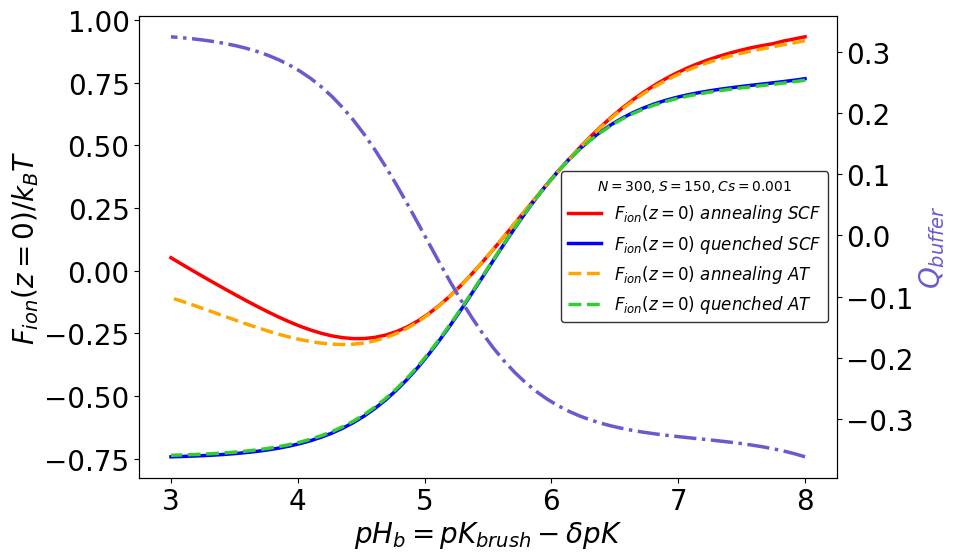

In [106]:
fig, axs1 = plt.subplots(nrows = 1, ncols = 1)

axs1.plot(pHb_range, free_energy_at_zero, linestyle = '-',
        linewidth = 2.5, color = 'red', label = f'$F_{{ion}}(z = 0) \\ annealing \\ SCF$')

axs1.plot(pHb_range, F_ion_at_zero_quecnhed, linestyle = '-',
        linewidth = 2.5, color = 'b', label = f'$F_{{ion}}(z = 0) \\ quenched \\ SCF$')

#THEORY

axs1.plot(pHb_range, free_energy_at_zero_theory, linestyle = '--',
        linewidth = 2.5, color = 'orange', label = f'$F_{{ion}}(z = 0) \\ annealing \\ AT$')

axs1.plot(pHb_range, F_ion_at_zero_quecnhed_theory, linestyle = '--',
        linewidth = 2.5, color = 'limegreen', label = f'$F_{{ion}}(z = 0) \\ quenched \\ AT$')

ax2 = axs1.twinx()

ax2.plot(pHb_range, charge_buf, linestyle = '-.',
        linewidth = 2.5, color='slateblue', label = f'$Q_b \\ annealing and quecnhed \\ SCF$')


axs1.set_xlabel('$pH_b = pK_{brush} - \delta pK$', 
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)

axs1.set_ylabel("$F_{ion}(z = 0)/k_BT$",
        fontsize = 20,
        color = 'black', 
        labelpad = 2.5)

ax2.set_ylabel("$Q_{buffer}$",
        fontsize = 20,
        color = 'slateblue', 
        labelpad = 2.5)

axs1.legend(title = f'$N = {N} , S = {S}, Cs = {Cs}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '10', 
        loc = 'center right')

fig.set_figwidth(9)
fig.set_figheight(6)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)
plt.show()
